In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_theme(style="darkgrid")


In [37]:
#  loading nbaPlayersAllTimesAgilityData.csv
df = pd.read_csv('nbaPlayersAllTimesStatsData.csv')

#  remove ' ' from column names /!\ invisible characters
df.columns = df.columns.str.replace(' ', ' ')

# remove space in playerName
df['PLAYER'] = df['PLAYER'].str.replace(' ', '')

# remove duplicates
df = df.drop_duplicates(subset=['PLAYER'], keep='first')

# replace every value equal to '-' with the mean of the other value in the columns
df = df.replace('-', np.nan)
df = df.apply(pd.to_numeric, errors='ignore')
df = df.fillna(df.mean(numeric_only=True))

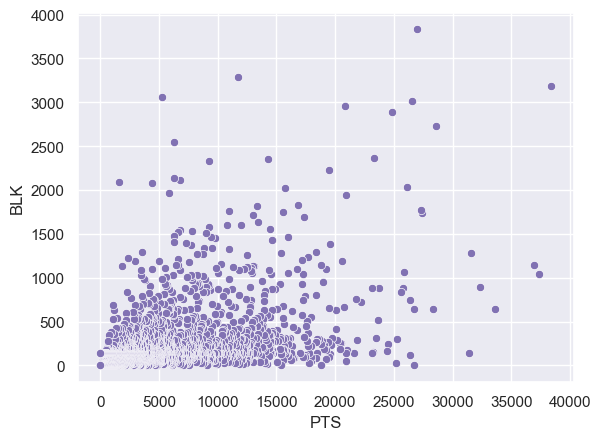

In [45]:
# PLOTTING 
df1 = df[['PTS', 'BLK']]
sns.scatterplot(x="PTS", y="BLK", data=df1,
                  color="m")
plt.show()


The initial thought was that since the correlation between blocks(BLK) and points(PTS) is above 0.5,
the trend would be that higher blocks means higher points. We expected to see dots on the higher parts of the points(PTS) and blocks(BLK), but that isn't the case for all situations in the above plot(That is, the dots are within a certain range). Meaning other factors play to this correlation.